**=======================================================================================================================**

# Webinar

## Uso de Jupyter
* Modo Edicion 
* Agregar o quitar celdas.
* Markdown

## Traer Data
* Desde hive
* Desde Archivo


## Sanity Check
* .head()
* .info()
* .shape
* .dtypes
* .describe
* .isna()
* .sum()
* .unique()
* .nunique()
* .value_counts()
* filtrar filas
* seleccionar variables


## Tratamiento de datos.
* Imputacion de nulos
* Outliers
* Tratamiento strings: upper, lower, replace
* Group by(ejemplo distribucion por periodo)
* Pivot_table
* Joins
* Concat
* Duplicados


## Creacion de variables
* Condicionales
* Funciones Lambda
* Row_number
* Case when en python

**=======================================================================================================================**

## Traer Data.

**Importamos librerias que vamos a usar en toda la NB**

In [1]:
import pandas as pd #Pandas para trabajar con dataframes
import numpy as np

import warnings
warnings.filterwarnings("ignore") #Ignorar warnings

import sys 
sys.path.append('/data/projects/studiob_repo_latam001/python/scripts/')

from studiob.cambrian import get_impala_query
from studiob.cambrian import execute_impala_query
from studiob.cambrian import get_hive_query

from studiob.cambrian import save_pandas_to_hive

### Desde texto plano - a modo informativo

1) CSV directo:

In [7]:
# dataset = pd.read_csv("/ruta/donde/esta/el/df/nombre_dataframe.csv")

df = pd.read_csv("data1.csv")

df_variables = pd.read_csv("data2.csv")

2) CSV que no esta delimitado por comas, ejemplo un txt delimitado por "|"

In [ ]:
# # dataset = pd.read_csv("/ruta/donde/esta/el/df/nombre_dataframe.txt", delimiter = "|")

### Desde Excel - a modo informativo

1) Basico

In [ ]:
# dataset = pd.read_excel("/ruta/donde/esta/el/df/nombre_dataframe.xlsx")

#Esto va a importar una sola hoja del excel en caso que contenga mas de una. La hoja que importara es la 1ra.

2) Importar una hoja en especial

In [ ]:
# dataset = pd.read_excel("/ruta/donde/esta/el/df/nombre_dataframe.xlsx", sheet_name = "nombre_hoja")

## Funciones Útiles

* .head()
* .info()
* .shape
* .dtypes
* .describe
* .isna()
* .sum()
* .unique()
* .nunique()
* .value_counts()

In [ ]:
# Observar las primeras N filas de un df (por default muestra las primeras 5)
df_variables.head()

,rut,periodo,archive,predictor1_7,predictor1_8,predictor1_9,predictor1_10,predictor1_11,predictor1_12,ignite_ise,ind_compra_paga
0,PlDKtWGFBg,201909.0,20190930.0,551.0,506.0,506.0,640.0,681.0,640.0,D,0.0
1,MOAbr9v9ac,201810.0,20181031.0,NaN,NaN,NaN,NaN,NaN,NaN,C3,0.0
2,49L1vb3c2I,201909.0,20190930.0,544.0,675.0,675.0,749.0,749.0,749.0,D,0.0
3,7xM1iIFNCb,201812.0,20181231.0,NaN,NaN,NaN,NaN,NaN,NaN,E,0.0
4,e2ayZYSD59,201809.0,20180930.0,NaN,NaN,NaN,NaN,NaN,NaN,E,0.0


In [ ]:
# Observar las ultimas N filas de un df (por default muestra las ultimas 5)
df_variables.tail()

,rut,periodo,archive,predictor1_7,predictor1_8,predictor1_9,predictor1_10,predictor1_11,predictor1_12,ignite_ise,ind_compra_paga
9995,aaoBjnEivN,201909.0,20190930.0,438.0,659.0,527.0,602.0,602.0,720.0,D,0.0
9996,ydTWpQrnQV,201912.0,20191231.0,605.0,605.0,605.0,605.0,648.0,648.0,D,0.0
9997,gE0FksUKBV,202003.0,20200331.0,805.0,805.0,805.0,805.0,805.0,805.0,C2,0.0
9998,5Vf8evWasd,201905.0,20190531.0,476.0,94.0,476.0,386.0,NaN,NaN,C1b,0.0
9999,WP6QjuqjbW,201908.0,20190831.0,746.0,746.0,799.0,569.0,569.0,569.0,D,0.0


In [ ]:
# Informacion general del df y todas sus columnas
df_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rut              10000 non-null  object 
 1   periodo          10000 non-null  float64
 2   archive          10000 non-null  float64
 3   predictor1_7     6538 non-null   float64
 4   predictor1_8     6143 non-null   float64
 5   predictor1_9     5756 non-null   float64
 6   predictor1_10    5329 non-null   float64
 7   predictor1_11    4900 non-null   float64
 8   predictor1_12    4421 non-null   float64
 9   ignite_ise       9973 non-null   object 
 10  ind_compra_paga  10000 non-null  float64
dtypes: float64(9), object(2)
memory usage: 859.5+ KB


In [ ]:
# Dimensiones del df (filas y columnas)
df_variables.shape

(10000, 11)

In [ ]:
# Tipo de datos de las columnas
df_variables.dtypes

rut                 object
periodo            float64
archive            float64
predictor1_7       float64
predictor1_8       float64
predictor1_9       float64
predictor1_10      float64
predictor1_11      float64
predictor1_12      float64
ignite_ise          object
ind_compra_paga    float64
dtype: object

In [ ]:
# Seleccionar columnas
df_variables[['predictor1_7','predictor1_9','predictor1_12']].head()

,predictor1_7,predictor1_9,predictor1_12
0,551.0,506.0,640.0
1,NaN,NaN,NaN
2,544.0,675.0,749.0
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [ ]:
# Observar distribucion de las variables -> describe()
df_variables[['predictor1_7','predictor1_9','predictor1_12']].describe()

,predictor1_7,predictor1_9,predictor1_12
count,6538.000000,5756.00000,4421.000000
mean,577.023402,581.39385,586.138430
std,199.811976,199.05757,197.749061
min,0.000000,0.00000,0.000000
25%,467.000000,476.00000,489.000000
50%,635.000000,638.00000,640.000000
75%,726.000000,728.00000,729.000000
max,985.000000,989.00000,988.000000


In [ ]:
# Observar distribucion de las variables -> describe() // Le agregamos percentiles
df_variables[['predictor1_7','predictor1_9','predictor1_12']].describe(percentiles=(0.95,0.99))

,predictor1_7,predictor1_9,predictor1_12
count,6538.000000,5756.00000,4421.000000
mean,577.023402,581.39385,586.138430
std,199.811976,199.05757,197.749061
min,0.000000,0.00000,0.000000
50%,635.000000,638.00000,640.000000
95%,815.150000,818.00000,817.000000
99%,855.000000,854.00000,859.000000
max,985.000000,989.00000,988.000000


In [ ]:
# Suma de una columna
df_variables['predictor1_7'].sum()

3772579.0

In [ ]:
# Detectar nulos en una columna 
df_variables['predictor1_7'].isna().sum()

3462

In [ ]:
# Detectar nulos en varias columnas
df_variables[['predictor1_7','predictor1_9']].isna().sum()

predictor1_7    3462
predictor1_9    4244
dtype: int64

In [ ]:
# Detectar nulos en varias columnas
df_variables[['predictor1_7','predictor1_9']].isna().mean()

predictor1_7    0.3462
predictor1_9    0.4244
dtype: float64

In [ ]:
# Filtrar filas (Operadores: < , > , != , ==) // 1 sola condición // condición univariada
df_variables[df_variables['predictor1_7'] == 635].head()

,rut,periodo,archive,predictor1_7,predictor1_8,predictor1_9,predictor1_10,predictor1_11,predictor1_12,ignite_ise,ind_compra_paga
533,xxUgLhBW4M,201909.0,20190930.0,635.0,677.0,586.0,677.0,677.0,716.0,C3,0.0
697,yBTmYzKiKS,201905.0,20190531.0,635.0,635.0,635.0,716.0,NaN,NaN,D,0.0
1022,otRdGSC7ce,201909.0,20190930.0,635.0,716.0,716.0,716.0,677.0,501.0,C3,0.0
1324,GRemHOaSx5,202003.0,20200331.0,635.0,635.0,501.0,501.0,501.0,635.0,E,0.0
2035,gH6Wx8DbXH,201902.0,20190228.0,635.0,NaN,NaN,NaN,NaN,NaN,E,0.0


In [ ]:
# Filtrar filas (Operadores: < , > , != , ==) // 1 sola condición // condición bivariada
df_variables[df_variables['predictor1_7'] == df_variables['predictor1_8']].head()

,rut,periodo,archive,predictor1_7,predictor1_8,predictor1_9,predictor1_10,predictor1_11,predictor1_12,ignite_ise,ind_compra_paga
7,kC6MdTAGmL,201911.0,20191130.0,771.0,771.0,771.0,799.0,799.0,799.0,C2,0.0
11,uRVTBn8y7S,201910.0,20191031.0,751.0,751.0,751.0,748.0,748.0,748.0,C3,0.0
15,Y9UDi7OzYc,201910.0,20191031.0,744.0,744.0,740.0,740.0,740.0,740.0,C3,0.0
18,Aw1pLWco1s,201912.0,20191231.0,729.0,729.0,795.0,691.0,608.0,603.0,D,0.0
24,l0sOmjCqmD,202001.0,20200131.0,772.0,772.0,771.0,802.0,881.0,881.0,C2,0.0


In [ ]:
# Filtrar filas (Operadores: < , > , != , ==) // Más de 1 condición
df_variables[(df_variables['predictor1_7'] == 635) & (df_variables['predictor1_9'] == 586.0)]

,rut,periodo,archive,predictor1_7,predictor1_8,predictor1_9,predictor1_10,predictor1_11,predictor1_12,ignite_ise,ind_compra_paga
533,xxUgLhBW4M,201909.0,20190930.0,635.0,677.0,586.0,677.0,677.0,716.0,C3,0.0


In [ ]:
# Filtrar filas + Seleccionar columnas
df_variables[df_variables['predictor1_7'] > 635][['predictor1_7','predictor1_9']]

,predictor1_7,predictor1_9
7,771.0,771.0
9,652.0,648.0
11,751.0,751.0
12,643.0,753.0
15,744.0,740.0
...,...,...
9989,674.0,674.0
9990,834.0,834.0
9993,717.0,717.0
9997,805.0,805.0


In [ ]:
# Valores UNICOS de una columna
df_variables['ignite_ise'].unique()

array(['D', 'C3', 'E', 'C2', 'C1a', 'C1b', 'Z', 'AB', nan], dtype=object)

In [ ]:
# Cantidad de valores UNICOS de una columna
df_variables['ignite_ise'].nunique()

8

In [ ]:
# Cantidad de registros por categoría
df_variables['ignite_ise'].value_counts()

D      3506
C3     2628
E      1758
C2     1127
C1b     495
C1a     273
Z       108
AB       78
Name: ignite_ise, dtype: int64

In [ ]:
# Cantidad de registros por categoría
df_variables['ind_compra_paga'].value_counts()

0.0    10000
Name: ind_compra_paga, dtype: int64

## Tratamiento de Datos

### Imputacion de nulos

#### Caso 1 - Imputamos con un valor hardcodeado

In [ ]:
# Definimos las columnas que queremos imputar
cols_to_impute = ['predictor1_7','predictor1_9']

In [ ]:
# Nulos antes de imputar
df_variables[cols_to_impute].isna().sum()

predictor1_7    3462
predictor1_9    4244
dtype: int64

In [ ]:
# Imputamos con un valor hardcodeado
df_variables[cols_to_impute] = df_variables[cols_to_impute].fillna(value=100)

In [ ]:
# Observamos nulos DESPUES de imputar
df_variables[cols_to_impute].isna().sum()

predictor1_7    0
predictor1_9    0
dtype: int64

#### Caso 2 - Imputamos por la media

In [ ]:
# Definimos las columnas que queremos imputar
cols_to_impute = ['predictor1_10','predictor1_11']

In [ ]:
# Observamos los nulos ANTES de imputar
df_variables[cols_to_impute].isna().sum()

predictor1_10    4671
predictor1_11    5100
dtype: int64

In [ ]:
df_variables['predictor1_10'].fillna(df_variables['predictor1_10'].mean(), inplace=True)

In [ ]:
df_variables['predictor1_11'].fillna(df_variables['predictor1_11'].mean(), inplace=True)

In [ ]:
# Observamos los nulos DESPUES de imputar
df_variables[cols_to_impute].isna().sum()

predictor1_10    0
predictor1_11    0
dtype: int64

### Outliers

In [ ]:
df_variables['predictor1_12'].describe(percentiles=(.95,.99))

count    4421.000000
mean      586.138430
std       197.749061
min         0.000000
50%       640.000000
95%       817.000000
99%       859.000000
max       988.000000
Name: predictor1_12, dtype: float64

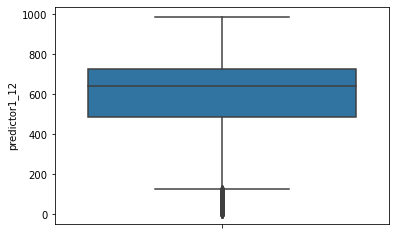

In [ ]:
import seaborn as sns
sns.boxplot(y='predictor1_12', data=df_variables)

In [ ]:
# Generamos outliers
df_variables.loc[:5,'predictor1_12'] = 3000

In [ ]:
# Observamos los outliers creados
df_variables.loc[:5,'predictor1_12']

0    3000.0
1    3000.0
2    3000.0
3    3000.0
4    3000.0
5    3000.0
Name: predictor1_12, dtype: float64

In [ ]:
# Chequeamos
df_variables['predictor1_12'].describe(percentiles=(.25,.95,.99))

count    4425.000000
mean      589.362486
std       216.690378
min         0.000000
25%       489.000000
50%       640.000000
95%       820.000000
99%       861.760000
max      3000.000000
Name: predictor1_12, dtype: float64

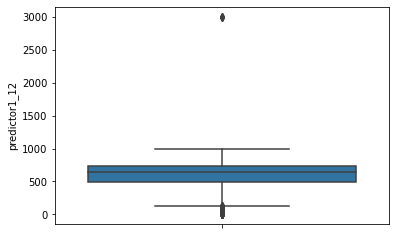

In [ ]:
# Chequeamos
sns.boxplot(y='predictor1_12', data=df_variables)

In [ ]:
# Capeamos los outliers superiores

q_99 = df_variables['predictor1_12'].quantile(.99)

df_variables['predictor1_12'] = df_variables['predictor1_12'].clip(lower=None,upper=q_99)

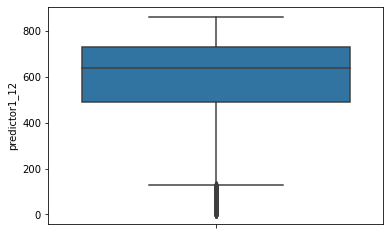

In [ ]:
# Chequeamos
sns.boxplot(y='predictor1_12', data=df_variables)

In [ ]:
# Capeamos los outliers inferiores

q_05 = df_variables['predictor1_12'].quantile(.05)

df_variables['predictor1_12'] = df_variables['predictor1_12'].clip(lower=q_05,upper=None)

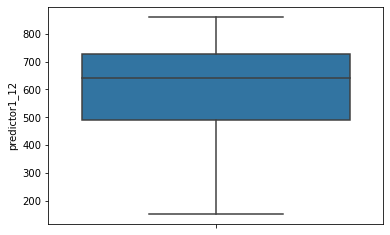

In [ ]:
# Chequeamos
sns.boxplot(y='predictor1_12', data=df_variables)

### Tratamiento strings: upper, lower, replace

Muchas veces hay que realizar cambios en variables que vienen como string, por ejemplo, llevar todo a mayúsculas, minúsculas, reemplazar un simbolo, dividir por algún valor (*split*), etc. Pandas trae incorporada distintas funciones que nos ayudan a cumplir estas tareas. La forma de acceder a estas funciones es la siguiente:

``` pd.Series.str.#funcion```

``` tu_df.tu_columna.str.upper()```

A continuación se encuentran ejemplos de esto.

In [ ]:
df.head()

,rut,periodo,archive,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final
0,PlDKtWGFBg,201909.0,20190930.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0
1,MOAbr9v9ac,201810.0,20181031.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0
2,49L1vb3c2I,201909.0,20190930.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0
3,7xM1iIFNCb,201812.0,20181231.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0
4,e2ayZYSD59,201809.0,20180930.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0


In [ ]:
#convertimos los valores a minusculas
df.captacion = df.captacion.str.lower()
df.head()

,rut,periodo,archive,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final
0,PlDKtWGFBg,201909.0,20190930.0,0.0,Rechazado,normal,1.0,596.0,1.0
1,MOAbr9v9ac,201810.0,20181031.0,1.0,Aprobado,express,4.0,NaN,0.0
2,49L1vb3c2I,201909.0,20190930.0,1.0,Aprobado,normal,3.0,633.0,0.0
3,7xM1iIFNCb,201812.0,20181231.0,1.0,Aprobado,express,4.0,NaN,0.0
4,e2ayZYSD59,201809.0,20180930.0,1.0,Aprobado,normal,0.0,NaN,0.0


Convierta los valores de vuelta a mayusculas

In [ ]:
df.captacion = df.captacion.str.upper()
df.head()

,rut,periodo,archive,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final
0,PlDKtWGFBg,201909.0,20190930.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0
1,MOAbr9v9ac,201810.0,20181031.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0
2,49L1vb3c2I,201909.0,20190930.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0
3,7xM1iIFNCb,201812.0,20181231.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0
4,e2ayZYSD59,201809.0,20180930.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0



Ahora, si reemplazar algún simbolo por podemos usar la funcion ```str.replace```, la cual toma un substring y lo convierte en otro.
Por ejemplo, reemplazar todas las "ex" por otro string en la columna ```captacion```

In [ ]:
df['captacion_nuevo'] = df.captacion.str.replace('EX','VOLDEMORT')
df.head()

,rut,periodo,archive,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo
0,PlDKtWGFBg,201909.0,20190930.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0,NORMAL
1,MOAbr9v9ac,201810.0,20181031.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS
2,49L1vb3c2I,201909.0,20190930.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0,NORMAL
3,7xM1iIFNCb,201812.0,20181231.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS
4,e2ayZYSD59,201809.0,20180930.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0,NORMAL


In [ ]:
df['asd'] = np.where(df.captacion.str.contains("EXP"), 1, 0)
df.head()

,rut,periodo,archive,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo,asd
0,PlDKtWGFBg,201909.0,20190930.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0,NORMAL,0
1,MOAbr9v9ac,201810.0,20181031.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,1
2,49L1vb3c2I,201909.0,20190930.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0,NORMAL,0
3,7xM1iIFNCb,201812.0,20181231.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,1
4,e2ayZYSD59,201809.0,20180930.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0,NORMAL,0


Esto es util cuando una fecha viene en un formato distinto al que necesitamos, o necesitamos estandarizar una columna que viene con distintos formatos (aaaa/mm/dd y aaaammdd en la misma columna).

Otras funciones que son utiles son ```.str.split``` y ```.str[]``` las cuales sirven para divir un string por algun valor, y seleccionar *slices* de un string o lista.

In [ ]:
# con astype podemos cambiar el tipo de dato de la columna

df.periodo.astype(str).str.split('.').head()

0    [201909, 0]
1    [201810, 0]
2    [201909, 0]
3    [201812, 0]
4    [201809, 0]
Name: periodo, dtype: object

In [ ]:
df.periodo.astype(str).str.split('.').str[0].head()

0    201909
1    201810
2    201909
3    201812
4    201809
Name: periodo, dtype: object

In [ ]:
# complete con distintas slices
df.captacion.str.

SyntaxError: invalid syntax (<ipython-input-77-4ddefef4d967>, line 2)

**=======================================================================================================================**

### Chequeo de duplicados (Kevin)

**Creamos un dataFrame de prueba**

In [ ]:
df_prueba = {'ID': [1, 2, 3, 4, 5, 6, 7, 7],
             'Nombre': ['Sigrid', 'Kennedy', 'Theodoric', 'Sigrid', 'Kennedy', 'Beatrix', 'Olimpia', 'Olimpia'],
             'Apellido': ['Mannock', 'Donnell', 'Rivers', 'Mannock', 'Donnell', 'Parlett', 'Guenther', 'Guenther'],
             'Edad': [27, 31, 36, 27, 53, 48, 36, 36],
             'Saldo': [7.17, 1.90, 1.11, 7.17, 1.41, 6.69, 4.62, 4.62]}
df_prueba = pd.DataFrame(df_prueba, columns = ['ID', 'Nombre', 'Apellido', 'Edad', 'Saldo'])

print(df_prueba.shape)
df_prueba

(8, 5)


,ID,Nombre,Apellido,Edad,Saldo
0,1,Sigrid,Mannock,27,7.17
1,2,Kennedy,Donnell,31,1.90
2,3,Theodoric,Rivers,36,1.11
3,4,Sigrid,Mannock,27,7.17
4,5,Kennedy,Donnell,53,1.41
5,6,Beatrix,Parlett,48,6.69
6,7,Olimpia,Guenther,36,4.62
7,7,Olimpia,Guenther,36,4.62


**Eliminamos duplicados en base a todas las columnas**

In [ ]:
df_prueba_1 = df_prueba.drop_duplicates()
print(df_prueba_1.shape)
df_prueba_1

(7, 5)


,ID,Nombre,Apellido,Edad,Saldo
0,1,Sigrid,Mannock,27,7.17
1,2,Kennedy,Donnell,31,1.90
2,3,Theodoric,Rivers,36,1.11
3,4,Sigrid,Mannock,27,7.17
4,5,Kennedy,Donnell,53,1.41
5,6,Beatrix,Parlett,48,6.69
6,7,Olimpia,Guenther,36,4.62


**Eliminamos duplicados en base a un conjunto de columnas. Por defecto se queda con el primer registro**

In [ ]:
df_prueba_1 = df_prueba.drop_duplicates(['Nombre', 'Apellido'])
print(df_prueba_1.shape)
df_prueba_1

(5, 5)


,ID,Nombre,Apellido,Edad,Saldo
0,1,Sigrid,Mannock,27,7.17
1,2,Kennedy,Donnell,31,1.90
2,3,Theodoric,Rivers,36,1.11
5,6,Beatrix,Parlett,48,6.69
6,7,Olimpia,Guenther,36,4.62


**Nos quedamos con el último registro**

In [ ]:
df_prueba_1 = df_prueba.drop_duplicates(['Nombre', 'Apellido'], keep='last')
print(df_prueba_1.shape)
df_prueba_1

(5, 5)


,ID,Nombre,Apellido,Edad,Saldo
2,3,Theodoric,Rivers,36,1.11
3,4,Sigrid,Mannock,27,7.17
4,5,Kennedy,Donnell,53,1.41
5,6,Beatrix,Parlett,48,6.69
7,7,Olimpia,Guenther,36,4.62


**=======================================================================================================================**

### Joinear datasets

**En esta NB se van a mostrar los dos tipos de join mas usados, inner join y left join**

***1) Inner join***

![image-2.png](attachment:image-2.png)

***2) Left join***

![image.png](attachment:image.png)




Para realizar joins cómo lo hacemos en sql, lo más común es usar la funcion MERGE de la liberaria pandas. Luego tenemos distintas opciones para "joinear", "mergear" o juntar información de dos dataframes, como pueden ser "join" o "concat".

**Merge**

**Código**:

```pd.merge(left_df, right_df, on=['claves de fusion'], how='inner'/'left'/'right')```
```
pd.merge(
    left,
    right,
    how: str = 'inner',
    on=None,
    left_on=None,
    right_on=None,
    left_index: bool = False,
    right_index: bool = False,
    sort: bool = False,
    suffixes=('_x', '_y'),
    copy: bool = True,
    indicator: bool = False,
    validate=None,
) ```


Joineemos los dos dataframes que tenemos, por las claves de fusion que serán rut, archive y periodo.

**Inner join**

In [ ]:
df_nuevo = pd.merge(df, df_variables, on=['rut', 'periodo', 'archive'], how='inner')

df_nuevo.head()

#df_nuevo = df.merge(df_variables,...).merge()

,rut,periodo,archive,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo,asd,predictor1_7,predictor1_8,predictor1_9,predictor1_10,predictor1_11,predictor1_12,ignite_ise,ind_compra_paga
0,PlDKtWGFBg,201909.0,20190930.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0,NORMAL,0,551.0,506.0,506.0,640.000000,681.000000,861.76,D,0.0
1,MOAbr9v9ac,201810.0,20181031.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,1,100.0,NaN,100.0,582.519234,586.224898,861.76,C3,0.0
2,49L1vb3c2I,201909.0,20190930.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0,NORMAL,0,544.0,675.0,675.0,749.000000,749.000000,861.76,D,0.0
3,7xM1iIFNCb,201812.0,20181231.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,1,100.0,NaN,100.0,582.519234,586.224898,861.76,E,0.0
4,e2ayZYSD59,201809.0,20180930.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0,NORMAL,0,100.0,NaN,100.0,582.519234,586.224898,861.76,E,0.0


Con el .head() podemos ver que el nuevo df contiene nuevas variables, las que agregamos desde df_variables. Vemos también que las variables que fueron clave de fusion no se duplicaron, lo cual es bueno. 

**Ahora ¿ Qué pasa si las claves de fusion se llaman distinto? Vamos a intentar replicar lo que en sql seria a.rut = b.rut and a.archive = b.archive, ....**

A pesar de que las variables se llaman, y el código debajo no haria falta en este caso, muchas veces se van a encontrar con distintos nombres de claves de fusion.

In [ ]:
df_nuevo = df.merge(df_variables, left_on=['rut', 'periodo', 'archive'], right_on=['rut', 'periodo', 'archive'], 
                               how='inner')

**Ejercicio**

1) Realizar un left join pero sólo trayendo algunas variables del dataset df_variables:
'predictor1_7', 'predictor1_8', 'predictor1_9', 'ignite_ise'

Llamar a este dataframe df_merge.

In [ ]:
#Realizar left_join 

df_merge = pd.merge(df, df_variables[['rut', 'periodo', 'archive', 'predictor1_7', 'predictor1_8', 'predictor1_9', 'ignite_ise']]
                                     , left_on=['rut', 'periodo', 'archive'], right_on=['rut', 'periodo', 'archive'], 
                               how='left')

df_merge.head()

,rut,periodo,archive,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo,asd,predictor1_7,predictor1_8,predictor1_9,ignite_ise
0,PlDKtWGFBg,201909.0,20190930.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0,NORMAL,0,551.0,506.0,506.0,D
1,MOAbr9v9ac,201810.0,20181031.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,1,100.0,NaN,100.0,C3
2,49L1vb3c2I,201909.0,20190930.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0,NORMAL,0,544.0,675.0,675.0,D
3,7xM1iIFNCb,201812.0,20181231.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,1,100.0,NaN,100.0,E
4,e2ayZYSD59,201809.0,20180930.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0,NORMAL,0,100.0,NaN,100.0,E


2) Chequear shapes de ambos datasets (original y joineado) para ver si tenemos la misma cantidad de variables y no tenemos duplicados. 

In [ ]:
display(df.shape,df_merge.shape)

(10000, 11)

(10000, 15)

In [ ]:
df.head()

,rut,periodo,archive,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo,asd
0,PlDKtWGFBg,201909.0,20190930.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0,NORMAL,0
1,MOAbr9v9ac,201810.0,20181031.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,1
2,49L1vb3c2I,201909.0,20190930.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0,NORMAL,0
3,7xM1iIFNCb,201812.0,20181231.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,1
4,e2ayZYSD59,201809.0,20180930.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0,NORMAL,0


**Join - ejemplo**

A pesar de que la mejor forma de joinear dataframes es utilizando MERGE, tenemos otra opciones como por ejemplo "join". La diferencia es que join no joinea por claves de fusion, sino que joinea por **ÍNDICE** (numero de fila en criollo). Por lo que si estamos seguros que el indice es el mismo en ambos dataframes, se puede joinear de esta manera.

In [ ]:
df_join = df.join(df_variables.drop(columns=['rut', 'periodo', 'archive']), how='left')

df_join.shape

(10000, 19)

In [ ]:
prueba  = df_join.copy()
prueba.set_index(['rut', 'periodo'], inplace=True)
prueba.head()

,,archive,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo,asd,predictor1_7,predictor1_8,predictor1_9,predictor1_10,predictor1_11,predictor1_12,ignite_ise,ind_compra_paga
rut,periodo,,,,,,,,,,,,,,,,,
PlDKtWGFBg,201909.0,20190930.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0,NORMAL,0,551.0,506.0,506.0,640.000000,681.000000,861.76,D,0.0
MOAbr9v9ac,201810.0,20181031.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,1,100.0,NaN,100.0,582.519234,586.224898,861.76,C3,0.0
49L1vb3c2I,201909.0,20190930.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0,NORMAL,0,544.0,675.0,675.0,749.000000,749.000000,861.76,D,0.0
7xM1iIFNCb,201812.0,20181231.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,1,100.0,NaN,100.0,582.519234,586.224898,861.76,E,0.0
e2ayZYSD59,201809.0,20180930.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0,NORMAL,0,100.0,NaN,100.0,582.519234,586.224898,861.76,E,0.0


Otra desventaja de join es que no podemos tener las mismas columnas en ambas bases, es decir que si hacemos:

``` df.join(df_variables, how='left')```

Nos va a arrojar un error ya que rut, archive y periodo se encuentran en ambos datasets.

### Concat (apilar)

In [ ]:
# Revisamos los periodos
print(df_variables.periodo.min())
print(df_variables.periodo.max())

201807.0
202003.0


#### Separamos el df en dos, en base a los periodos

In [ ]:
df_prueba1 = df_variables[df_variables['periodo'] <= 201912][['periodo','predictor1_7','predictor1_9','ignite_ise']]
df_prueba1.head()

,periodo,predictor1_7,predictor1_9,ignite_ise
0,201909.0,551.0,506.0,D
1,201810.0,100.0,100.0,C3
2,201909.0,544.0,675.0,D
3,201812.0,100.0,100.0,E
4,201809.0,100.0,100.0,E


In [ ]:
print(df_prueba1.periodo.min())
print(df_prueba1.periodo.max())

201807.0
201912.0


In [ ]:
df_prueba2 = df_variables[df_variables['periodo'] > 201912][['periodo','predictor1_7','predictor1_9','ignite_ise']]

In [ ]:
print(df_prueba2.periodo.min())
print(df_prueba2.periodo.max())

202001.0
202003.0


#### Listo

In [ ]:
# Apilamos los dos dataframes. ATENCION: revisar que las columnas sean las mismas y en el mismo orden
df_prueba_1y2 = pd.concat([df_prueba1, df_prueba2], axis=0, ignore_index=True)

# Mencionar axis=1

In [ ]:
df_prueba_1y2.head()

,periodo,predictor1_7,predictor1_9,ignite_ise
0,201909.0,551.0,506.0,D
1,201810.0,100.0,100.0,C3
2,201909.0,544.0,675.0,D
3,201812.0,100.0,100.0,E
4,201809.0,100.0,100.0,E


In [ ]:
# Chequeo -> Tiene que quedar igual que antes de dividir el df
print(df_prueba_1y2.periodo.min())
print(df_prueba_1y2.periodo.max())

201807.0
202003.0


**=======================================================================================================================**

### Pivot table

Pivot table es otra forma de realizar group by, la cuál es muy facil de entender si estamos acostumbrados a trabajar con tablas dinamicas en excel.

**Código:**

```pd.pivot_table(data, index='variable o variables indice', columns='variable o variables de columna', values='variable sobre la cual se va a calcular suma/cuenta/media/..., aggfunc='funciones de agregación que se van a apicar a cada variable')```


```pd.pivot_table(
    data,
    values=None,
    index=None,
    columns=None,
    aggfunc='mean',
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All',
    observed=False,
)```

**Ejemplo - calcular la bad rate por periodo y la cantidad de registros:**

Podemos ver que no usaremos parametro "column" ya que no hace falta, porque estamos agrupando por periodo y caluculando la media de marca malo (bad rate) y la cuenta de registros (0 y 1) por periodo.

In [ ]:
pd.pivot_table(df_merge, index='periodo', values='marca_60d_6m_final', aggfunc=['mean', 'count', 'sum']).head()

,mean,count,sum
,marca_60d_6m_final,marca_60d_6m_final,marca_60d_6m_final
periodo,,,
201807.0,0.149378,482,72.0
201808.0,0.166667,468,78.0
201809.0,0.216802,369,80.0
201810.0,0.175153,491,86.0
201811.0,0.206897,493,102.0


**Ejemplo - Queremos ver la cantidad de malos y buenos por periodo**

In [ ]:
pd.pivot_table(df_merge, index='periodo', columns='marca_60d_6m_final', values='rut', aggfunc='count').head()

marca_60d_6m_final,0.0,1.0
periodo,,
201807.0,410,72
201808.0,390,78
201809.0,289,80
201810.0,405,86
201811.0,391,102


Acá vemos que agregamos el parametro columna ya que queremos que cuente separando por marca malo (0 o 1). Como values pusimos rut ya que es una columna sin nulos que nos sirve para hacer el count.

**Ejemplo - agrupar por periodo (indice), ver por captacion (columnas) sobre las columnas rut (count) y cant_tel (media).**

In [ ]:
pd.pivot_table(df_merge, index='periodo', columns='captacion', values=['rut', 'cant_tel'],
              aggfunc={'rut':'count',
                      'cant_tel':'mean'}).head()

cant_tel               rut       
captacion   EXPRESS    NORMAL EXPRESS NORMAL
periodo                                     
201807.0   2.752688  2.029557     279    203
201808.0   2.850365  2.237113     274    194
201809.0   2.788546  2.169014     227    142
201810.0   2.752809  1.901786     267    224
201811.0   2.777778  2.038793     261    232

Vemos que para mapear variable en values con la funcion, creamos un diccionario en aggfunc y elegimos que metrica calcularle a cada uno.

**Otra forma de verlo es sin usar el parametro columna** - Esto va a ser más util para crear un nuevo dataframe.

In [ ]:
pd.pivot_table(df_merge, index=['periodo','captacion'], values=['rut', 'cant_tel'],
              aggfunc={'rut':'count',
                      'cant_tel':'mean'}).head()

cant_tel  rut
periodo  captacion               
201807.0 EXPRESS    2.752688  279
         NORMAL     2.029557  203
201808.0 EXPRESS    2.850365  274
         NORMAL     2.237113  194
201809.0 EXPRESS    2.788546  227

**La importancia de .reset_index()**

Es muy importante destacar que si vamos a querer crear un dataset con la agrupacion realizada, es IMPRESCINDIBLE usar .reset_index() al final del codigo, ya que sino no quedara en el formato correcto.

Miremos el ejemplo de arriba aplicando reset_index()

In [ ]:
pd.pivot_table(df_merge, index=['periodo','captacion'], values=['rut', 'cant_tel'],
              aggfunc={'rut':'count',
                      'cant_tel':'mean'}).reset_index().head()

,periodo,captacion,cant_tel,rut
0,201807.0,EXPRESS,2.752688,279
1,201807.0,NORMAL,2.029557,203
2,201808.0,EXPRESS,2.850365,274
3,201808.0,NORMAL,2.237113,194
4,201809.0,EXPRESS,2.788546,227


Se puede ver claramente que este formato es más ameno y nos sirve como un dataset para seguir usando, joineando, etc.

**Ejercicio**

Agrupar por captacion y obtener la media y el desvio de cant_tel. Para esto crear un nuevo dataset que se llame: info_captacion.

Una vez obtenido esto, joinear la nueva columna al df_merge con un left_join (clave de fusion='captacion'). 

Pista: Para esto una vez obtenido el df info_captacion, debemos renombrar las columnas de manera correcta.

``` info_captacion.columns = ['captacion', 'mean_cant_tel', 'std_cant_tel'] ```

In [ ]:
info_captacion = pd.pivot_table(df_merge, index='captacion', values='cant_tel', aggfunc=['mean', 'std']).reset_index()
info_captacion.columns = ['captacion', 'mean_cant_tel', 'std_cant_tel']
info_captacion.head()

,captacion,mean_cant_tel,std_cant_tel
0,EXPRESS,3.038442,2.181354
1,NORMAL,2.170590,1.951541


In [ ]:
df_merge = pd.merge(df_merge, info_captacion, on=['captacion'], how='left')

df_merge.head()

,rut,periodo,archive,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo,asd,predictor1_7,predictor1_8,predictor1_9,ignite_ise,mean_cant_tel,std_cant_tel
0,PlDKtWGFBg,201909.0,20190930.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0,NORMAL,0,551.0,506.0,506.0,D,2.170590,1.951541
1,MOAbr9v9ac,201810.0,20181031.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,1,100.0,NaN,100.0,C3,3.038442,2.181354
2,49L1vb3c2I,201909.0,20190930.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0,NORMAL,0,544.0,675.0,675.0,D,2.170590,1.951541
3,7xM1iIFNCb,201812.0,20181231.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,1,100.0,NaN,100.0,E,3.038442,2.181354
4,e2ayZYSD59,201809.0,20180930.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0,NORMAL,0,100.0,NaN,100.0,E,2.170590,1.951541


**=======================================================================================================================**

### Group by

Group by es la forma más simple para agrupar variables. Es un poco más simple que pivot_table y las funciones son muy similares. **Muy importante recordar .reset_index() ya que cumple la misma funcion aquí**

**Código**

``` dataset.groupby(['variables de agrupacion'])['variables a calcular metrica'].agg(['métricas: count/mean/sum') ```

Pueden ser mas de una variable de agrupacion, mas de una variable a calcular metrica y más de una metrica.

**Ejemplo - Agrupar por captacion y calcular la media y la cantidad de registros utilizando la variable marca_60d_6m_final**

In [ ]:
df_merge.groupby(['captacion'])['marca_60d_6m_final'].agg(['mean', 'count']).reset_index()

,captacion,mean,count
0,EXPRESS,0.134036,5879
1,NORMAL,0.302596,4121


**Ejercicio**

Agrupar por captacion y periodo, la bad rate (mean de marca_60d_6m_final). Convertir en dataframe en el formato correcto.

In [ ]:
df_merge.groupby(['captacion', 'periodo'])['marca_60d_6m_final'].mean().reset_index().head()

,captacion,periodo,marca_60d_6m_final
0,EXPRESS,201807.0,0.111111
1,EXPRESS,201808.0,0.105839
2,EXPRESS,201809.0,0.171806
3,EXPRESS,201810.0,0.104869
4,EXPRESS,201811.0,0.157088


**=======================================================================================================================**

## Creación de variables

### Condicionales (Tipo Case When en SQL)

#### 1) Para datos categoricos

In [ ]:
df.captacion.value_counts()

EXPRESS    5879
NORMAL     4121
Name: captacion, dtype: int64

- Usando np.where

In [ ]:
df['captacion_corregido'] = np.where((df['captacion'] == 'EXPRESS'), 'Rápido', 
                            np.where((df['captacion'] == 'NORMAL'),  'Básico', 'revisar'))

In [ ]:
df.captacion_corregido.value_counts()

Rápido    5879
Básico    4121
Name: captacion_corregido, dtype: int64

#### varios condicionales anidados

In [ ]:
df['nueva_categoria'] = np.where((df['estado_solicitud'] == 'Aprobado') & (df['captacion_corregido'] == 'Rápido'), 'Cat_A', 
                        np.where((df['estado_solicitud'] == 'Aprobado') & (df['captacion_corregido'] == 'Básico'), 'Cat_B',
                        np.where((df['estado_solicitud'] == 'Rechazado') & (df['captacion_corregido'] == 'Rápido'), 'Cat_C',
                        np.where((df['estado_solicitud'] == 'Rechazado') & (df['captacion_corregido'] == 'Básico'),  'Cat_D', 'Revisar'))))

In [ ]:
df.nueva_categoria.value_counts(dropna=False)

Cat_A    5820
Cat_D    2180
Cat_B    1941
Cat_C      59
Name: nueva_categoria, dtype: int64

In [ ]:
df.head()

,rut,periodo,archive,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_corregido,nueva_categoria
0,PlDKtWGFBg,201909.0,20190930.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0,Básico,Cat_D
1,MOAbr9v9ac,201810.0,20181031.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,Rápido,Cat_A
2,49L1vb3c2I,201909.0,20190930.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0,Básico,Cat_B
3,7xM1iIFNCb,201812.0,20181231.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,Rápido,Cat_A
4,e2ayZYSD59,201809.0,20180930.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0,Básico,Cat_B


- Usando IF-ELSE

In [ ]:
df['captacion_corregido']=df.apply(
    lambda x: 'Rápido' if (x['captacion'] == 'EXPRESS') else
               'Básico' if (x['captacion'] == 'NORMAL') else
              'Revisar', axis=1)

In [ ]:
df.captacion_corregido.value_counts()

Rápido    5879
Básico    4121
Name: captacion_corregido, dtype: int64

In [ ]:
def clasificar(variable):
    if variable == 'EXPRESS':
        return 'Rápido'
    elif variable == 'NORMAL':
        return 'Básico'

df['captacion_corregido_2'] = df.captacion.apply(clasificar)

In [ ]:
df.captacion_corregido_2.value_counts()

Rápido    5879
Básico    4121
Name: captacion_corregido_2, dtype: int64

- Usando Map

In [ ]:
dict ={'EXPRESS': 'Rápido',
      'NORMAL': 'Básico' 
      }
df['captacion_corregido_3'] = df.captacion.map(dict)

In [ ]:
df.captacion_corregido_3.value_counts()

Rápido    5879
Básico    4121
Name: captacion_corregido_3, dtype: int64

- Usando Replace

In [ ]:
df.replace(
    {'captacion': {'EXPRESS': 'Rápido',
               'NORMAL': 'Básico' 
            }},
    inplace = True
)

In [ ]:
df.head()

,rut,periodo,archive,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,estado_solicitud_new,valor,captacion_corregido,captacion_corregido_2,captacion_corregido_3
0,PlDKtWGFBg,201909.0,20190930.0,0.0,Rechazado,Básico,1.0,596.0,1.0,Rechazado,Bajo,Básico,Básico,Básico
1,MOAbr9v9ac,201810.0,20181031.0,1.0,Aprobado,Rápido,4.0,NaN,0.0,Aprobado,Alto,Rápido,Rápido,Rápido
2,49L1vb3c2I,201909.0,20190930.0,1.0,Aprobado,Básico,3.0,633.0,0.0,Aprobado,Medio,Básico,Básico,Básico
3,7xM1iIFNCb,201812.0,20181231.0,1.0,Aprobado,Rápido,4.0,NaN,0.0,Aprobado,Alto,Rápido,Rápido,Rápido
4,e2ayZYSD59,201809.0,20180930.0,1.0,Aprobado,Básico,0.0,NaN,0.0,Rechazado,Bajo,Básico,Básico,Básico


#### 2) Para datos numericos

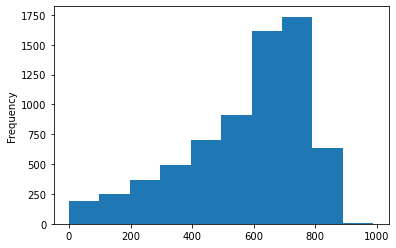

In [ ]:
df.predictor1_6.plot.hist()

- Usando np.where

In [ ]:
df['flag_predictor'] = np.where(df['predictor1_6'] > 800, 'Alto', 
                       np.where(df['predictor1_6'] > 600, 'Medio', 
                       np.where(df['predictor1_6'] <= 600, 'Bajo', 'Revisar')))

In [ ]:
df.flag_predictor.value_counts()

Medio      3353
Revisar    3096
Bajo       3022
Alto        529
Name: flag_predictor, dtype: int64

- Usando If-else

In [ ]:
df['flag_predictor']=df.apply(
    lambda x: 'Alto' if (x['predictor1_6'] > 800) else
               'Medio' if (x['predictor1_6'] > 600) else
               'Bajo' if (x['predictor1_6'] <= 600) else
               'Nulos' if (pd.isnull(x['predictor1_6']) == True) else
              'Revisar', axis=1)

In [ ]:
df.flag_predictor.value_counts()

Medio    3353
Nulos    3096
Bajo     3022
Alto      529
Name: flag_predictor, dtype: int64

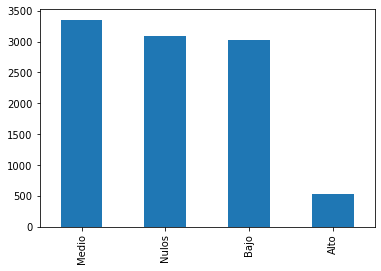

In [ ]:
df.flag_predictor.value_counts().plot.bar()

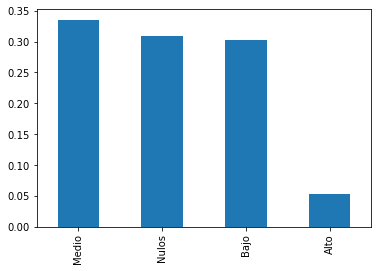

In [ ]:
df.flag_predictor.value_counts(normalize=True).plot.bar()

- Usando mask

In [ ]:
df['flag_predictor_2'] = (df.predictor1_6.mask(df.predictor1_6 > 800, 'Alto').
                                     mask(df.predictor1_6 <= 800, 'Medio').
                                     mask(df.predictor1_6 <= 600, 'Bajo').
                                     mask(df.predictor1_6.isnull() == True, 'Nulos'))

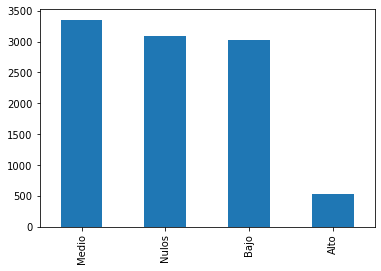

In [ ]:
df.flag_predictor_2.value_counts().plot.bar()

- Usando cut

In [ ]:
bins = [-1,600,800,1000]
labels =['Bajo','Medio','Alto']

df['flag_predictor_3'] = pd.cut(df['predictor1_6'], bins = bins, labels = labels).astype('str')

In [ ]:
df.replace(
    {'flag_predictor_3': {'nan': 'Nulos'}},
    inplace = True
)

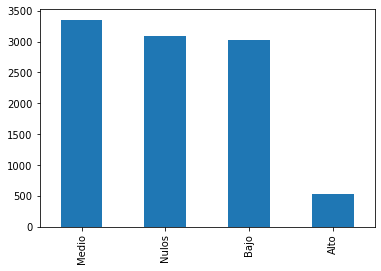

In [ ]:
df.flag_predictor_3.value_counts().plot.bar()

### Row_number (Tipo SQL)

In [ ]:
df.groupby('rut')['periodo'].count().reset_index().sort_values(by='periodo', ascending=0).head(10)

,rut,periodo
9493,wr8G5C5iw6,2
7788,mJoprO831c,2
7750,m4U0C5YJ50,2
4366,R7DCPF4Rw9,2
1246,7QBLAdPCOG,2
6716,fdqAHGeoDr,2
3441,LT1Vl2czqX,2
3729,NGVgy67x62,2
5810,aHJJwc0Lr3,2
0,006YjYYfuu,1


In [ ]:
df.shape

(10000, 13)

In [ ]:
df.query("rut=='fdqAHGeoDr'")

,rut,periodo,archive,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_corregido,captacion_corregido_2,captacion_corregido_3,flag_predictor,flag_predictor_2,flag_predictor_3,estado_solicitud_new,valor
3644,fdqAHGeoDr,201910.0,20191031.0,0.0,Rechazado,normal,2.0,521.0,0.0,0,None,NaN,Bajo,Bajo,Bajo,Rechazado,Bajo
6006,fdqAHGeoDr,201812.0,20181231.0,0.0,Rechazado,normal,2.0,NaN,0.0,0,None,NaN,Nulos,Nulos,Nulos,Rechazado,Bajo


In [ ]:
df["row_number"] = df.groupby('rut')['periodo'].rank(method = "first", ascending = 1)

In [ ]:
df_filtrado = df.query("row_number==1")

In [ ]:
df_filtrado.shape

(9991, 18)